**Applying CNN for two class image classification**

The data used contains images from only two class
* Pizza
* Steak 

In [1]:
import pandas as pd 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import seaborn as sns 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/drive/MyDrive/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
import os 
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories {len(filenames)} images in {(dirpath)}")

There are 2 directories 0 images in pizza_steak
There are 2 directories 0 images in pizza_steak/train
There are 0 directories 750 images in pizza_steak/train/steak
There are 0 directories 750 images in pizza_steak/train/pizza
There are 2 directories 0 images in pizza_steak/test
There are 0 directories 250 images in pizza_steak/test/steak
There are 0 directories 250 images in pizza_steak/test/pizza


In [7]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [8]:
import pathlib 
data_dir=pathlib.Path("/content/pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
import matplotlib.image as mpimg
import random 

def get_random_image(target_dir):
  random_index=np.random.randint(0,2)
  target_class=class_names[random_index]
  target_folder=target_dir+"/"+target_class
  random_image=random.sample(os.listdir(target_folder), 1)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image Shape: {img.shape}")
  return img

Image Shape: (512, 512, 3)


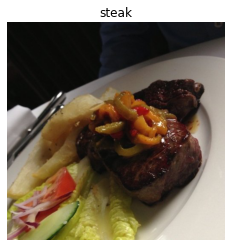

In [10]:
img=get_random_image(target_dir='/content/pizza_steak/train')

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1/255.)
valid_datagen=ImageDataGenerator(rescale=1/255.)

# Setting train data and test data path 

In [12]:
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
test_data=train_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Initializing, compiling and fitting the CNN model to train data

In [13]:
model=tf.keras.Sequential([
      tf.keras.layers.Conv2D(10, 3, strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPool2D(2, padding='valid'),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(2, padding='valid'),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(2, padding='valid'),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(2, padding='valid'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')

])

#Compiling the model with the loss and the optmizer functions 
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics='accuracy')

#Fitting the model, here 10 epochs are used for the training dataset 
history=model.fit(train_data, epochs=10,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 17s 186ms/step - loss: 0.6351 - accuracy: 0.6267 - val_loss: 0.5106 - val_accuracy: 0.7600
Epoch 2/10
47/47 [==============================] - 8s 177ms/step - loss: 0.4886 - accuracy: 0.7787 - val_loss: 0.4318 - val_accuracy: 0.8040
Epoch 3/10
47/47 [==============================] - 10s 204ms/step - loss: 0.4329 - accuracy: 0.8013 - val_loss: 0.3872 - val_accuracy: 0.8260
Epoch 4/10
47/47 [==============================] - 8s 174ms/step - loss: 0.4118 - accuracy: 0.8187 - val_loss: 0.3663 - val_accuracy: 0.8600
Epoch 5/10
47/47 [==============================] - 8s 174ms/step - loss: 0.4025 - accuracy: 0.8213 - val_loss: 0.3267 - val_accuracy: 0.8600
Epoch 6/10
47/47 [==============================] - 8s 175ms/step - loss: 0.3947 - accuracy: 0.8307 - val_loss: 0.3238 - val_accuracy: 0.8580
Epoch 7/10
47/47 [==============================] - 8s 175ms/step - loss: 0.3772 - accuracy: 0.8380 - val_loss: 0.3097 - val_accuracy: 0.8740
Epoc

In [14]:
model_preds=model.predict(test_data)

16/16 [==============================] - 2s 124ms/step


# Plotting Loss Curve and Accuracy curve for training and testing data

In [40]:
def plot_loss_and_accuracy(history):
    loss=history.history['loss']
    test_loss=history.history['val_loss']
    accuracy=history.history['accuracy']
    test_accuracy=history.history['val_accuracy']
    epochs=range(len(history.history['loss']))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, test_loss, label='Testing Loss');
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, test_accuracy, label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend();

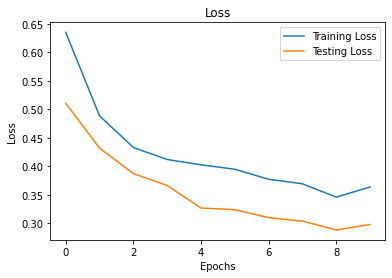

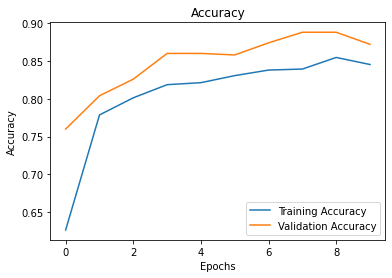

In [41]:
plot_loss_and_accuracy(history)

# Testing the CNN model on a custom image

Here a custom image of pizza is used to predict its class using CNN model

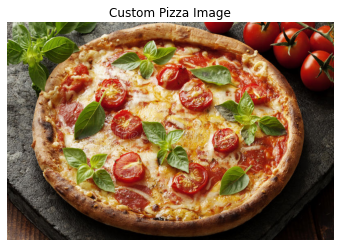

In [36]:
pizza=mpimg.imread('/content/pizza.jpg')
plt.title("Custom Pizza Image")
plt.axis('off')
plt.imshow(pizza);

In [37]:
cust_pizza_image=tf.image.resize(pizza, size=(224,224))

In [38]:
cust_pizza_image/=255.
cust_pizza_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.33660212, 0.32240397, 0.30401286],
        [0.440615  , 0.4264168 , 0.4080257 ],
        [0.42798993, 0.3926958 , 0.36524484],
        ...,
        [0.2743766 , 0.25532934, 0.22032496],
        [0.17718343, 0.16437575, 0.14144418],
        [0.16700697, 0.1573281 , 0.12120736]],

       [[0.45114547, 0.45479566, 0.4228804 ],
        [0.5734531 , 0.5771033 , 0.545188  ],
        [0.41486722, 0.3795731 , 0.35212213],
        ...,
        [0.19814585, 0.1841617 , 0.14876463],
        [0.19831087, 0.18658492, 0.15832396],
        [0.290353  , 0.27940238, 0.2520102 ]],

       [[0.4433686 , 0.4245661 , 0.3875125 ],
        [0.28245673, 0.26365423, 0.22660065],
        [0.5630915 , 0.5277974 , 0.5003464 ],
        ...,
        [0.16775478, 0.17239435, 0.06815873],
        [0.36108992, 0.36115345, 0.26242405],
        [0.51583445, 0.52242076, 0.37526077]],

       ...,

       [[0.6158908 , 0.47583482, 0.38171715],
        [0.62

In [39]:
pred_pizza=model.predict(tf.expand_dims(cust_pizza_image, axis=0))
pred_class=class_names[int(tf.round(pred_pizza))]
pred_class

1/1 [==============================] - 0s 14ms/step


'pizza'

# Testing using CNN model with different architecture.

In [42]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics='accuracy')

history_2=model_2.fit(train_data, 
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 11s 203ms/step - loss: 0.6397 - accuracy: 0.6353 - val_loss: 0.4688 - val_accuracy: 0.7820
Epoch 2/10
47/47 [==============================] - 8s 181ms/step - loss: 0.4622 - accuracy: 0.7980 - val_loss: 0.3775 - val_accuracy: 0.8460
Epoch 3/10
47/47 [==============================] - 10s 222ms/step - loss: 0.4280 - accuracy: 0.8167 - val_loss: 0.3656 - val_accuracy: 0.8540
Epoch 4/10
47/47 [==============================] - 9s 184ms/step - loss: 0.4003 - accuracy: 0.8360 - val_loss: 0.3362 - val_accuracy: 0.8560
Epoch 5/10
47/47 [==============================] - 9s 184ms/step - loss: 0.3750 - accuracy: 0.8433 - val_loss: 0.3368 - val_accuracy: 0.8580
Epoch 6/10
47/47 [==============================] - 9s 195ms/step - loss: 0.3360 - accuracy: 0.8627 - val_loss: 0.3444 - val_accuracy: 0.8520
Epoch 7/10
47/47 [==============================] - 9s 184ms/step - loss: 0.3150 - accuracy: 0.8673 - val_loss: 0.3615 - val_accuracy: 0.8440
Epoc

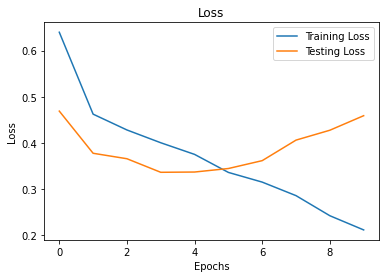

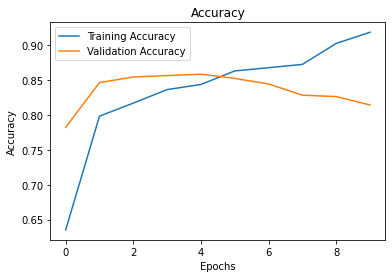

In [43]:
plot_loss_and_accuracy(history_2)

**The first model performs better than the second model in terms of accuracy and loss**